# Exploring Countries that may need Humanitarian Help

## Problem Description

In order to determine what countries may need humanitarian help at the moment, a clustering analysis may be a good starting point.

Given a dataset with information about 167 countries, the goal of this experiment is to segmentate the countries in clusters to then determine which groups may need help more urgently.

## How to execute this notebook

1. Creating a Python environment is encouraged:
  - With **Conda**: `conda create -n countries-clustering python=3.11`

2. Install requirements:
  - `pip install -r requirements.txt`

## Data Exploration

In [1]:
import pandas as pd

df = pd.read_csv('../data/country-data.csv')
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
df.shape

(167, 10)

In [3]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(exclude='object').columns.tolist()

print('Categorical Features: ', *categorical_features)
print('Numerical Features: ', *numerical_features)

Categorical Features:  country
Numerical Features:  child_mort exports health imports income inflation life_expec total_fer gdpp


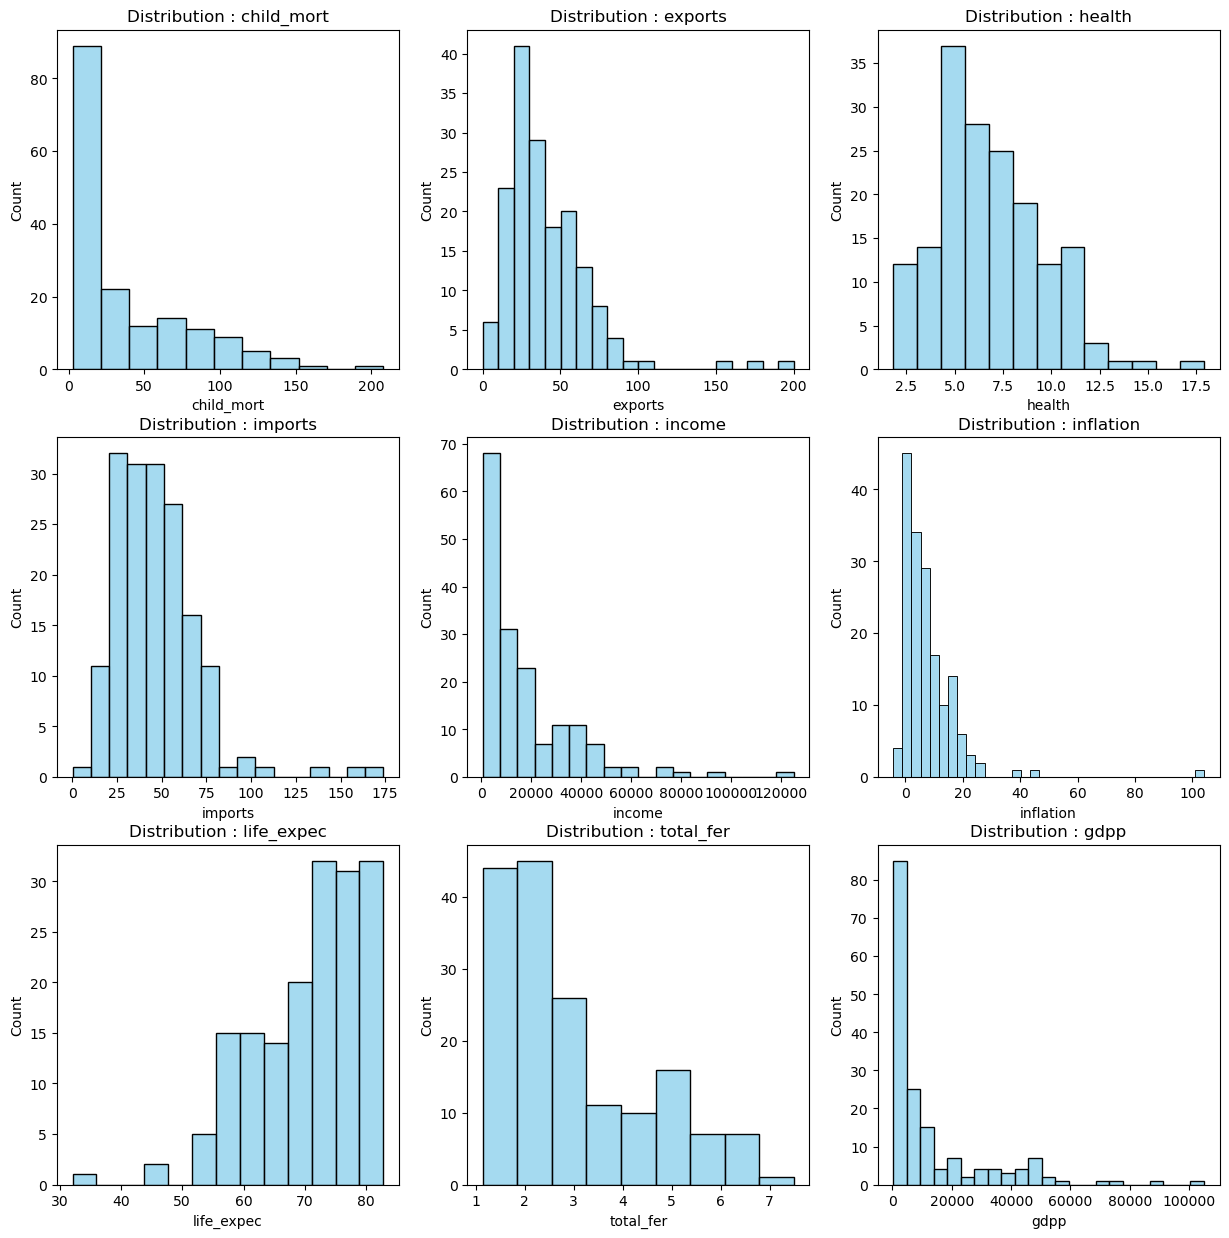

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[numerical_features[i]],color = 'skyblue')
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

## Data Preprocessing

In [7]:
# Remove the categorical features
countries = df.pop('country')

In [8]:
# Normalize data with the `normalize` method
from sklearn.preprocessing import normalize

df = pd.DataFrame(normalize(df), columns=df.columns)

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.016046,0.005725,0.001382,0.009435,0.857365,0.001821,0.012721,0.000915,0.480679
std,0.031387,0.007224,0.002301,0.014596,0.100431,0.003551,0.015572,0.001604,0.148078
min,0.000020,0.000028,0.000013,0.000017,0.456921,-0.000182,0.000554,0.000012,0.236038
25%,0.000285,0.001424,0.000230,0.001245,0.831418,0.000082,0.002767,0.000063,0.371936
50%,0.002000,0.002995,0.000503,0.004042,0.894966,0.000515,0.006146,0.000195,0.443171
75%,0.016766,0.007075,0.001419,0.011165,0.925480,0.001989,0.016035,0.000956,0.555628
max,0.163415,0.057900,0.015013,0.117818,0.971387,0.029302,0.081003,0.009213,0.889144


## Clustering

### KMeans

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

models_and_sil = []

for n_cls in range(2, 6):
    kmeans = KMeans(n_clusters=n_cls)
    kmeans.fit(df.values)
    models_and_sil.append({
        'model': kmeans,
        'sil_values': silhouette_samples(df, kmeans.labels_),
        'sil_avg': silhouette_score(df, kmeans.labels_)
    })

In [10]:
best_model = max(models_and_sil, key=lambda x: x['sil_avg'])
kmeans = best_model['model']
n_clusters = kmeans.n_clusters
sil_values = best_model['sil_values']
sil_avg = best_model['sil_avg']

df['cluster'] = kmeans.labels_
df['country'] = countries

print('Best model:')
print(f'Clusters -- {n_clusters} clusters')
print(f'Silhouette Average -- {sil_avg}\n\n')
print('Cluster 0:')
print(f"{df[df['cluster']==0].describe()}\n\n")
print('Cluster 1:')
print(f"{df[df['cluster']==1].describe()}")

Best model:
Clusters -- 2 clusters
Silhouette Average -- 0.6410760013081505


Cluster 0:
       child_mort    exports     health    imports     income  inflation  \
count   40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean     0.002007   0.002010   0.000584   0.003801   0.701584   0.000399   
std      0.005395   0.003860   0.001078   0.008314   0.077457   0.001165   
min      0.000020   0.000179   0.000056   0.000228   0.456921  -0.000048   
25%      0.000067   0.000568   0.000166   0.000599   0.656514   0.000013   
50%      0.000094   0.000835   0.000206   0.000803   0.693456   0.000028   
75%      0.000413   0.001388   0.000274   0.001396   0.762122   0.000099   
max      0.027424   0.022395   0.004942   0.036885   0.820800   0.006545   

       life_expec  total_fer       gdpp  cluster  
count   40.000000  40.000000  40.000000     40.0  
mean     0.004348   0.000219   0.704405      0.0  
std      0.006700   0.000474   0.075414      0.0  
min      0.000583   0.

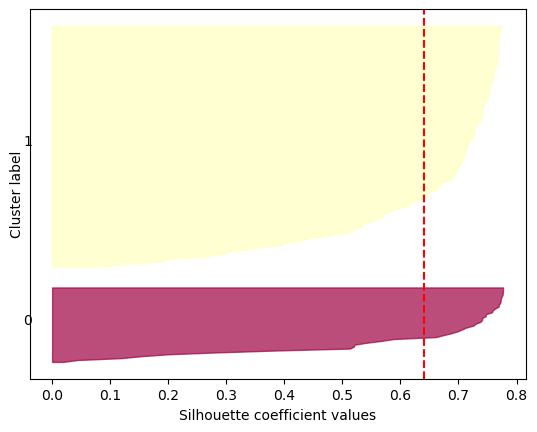

In [11]:
import numpy as np

fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sil_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.colormaps.get_cmap('Spectral')(i / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette coefficient values')
ax.set_ylabel('Cluster label')
ax.axvline(x=sil_avg, color='red', linestyle='--')
ax.set_yticks([])
plt.show()

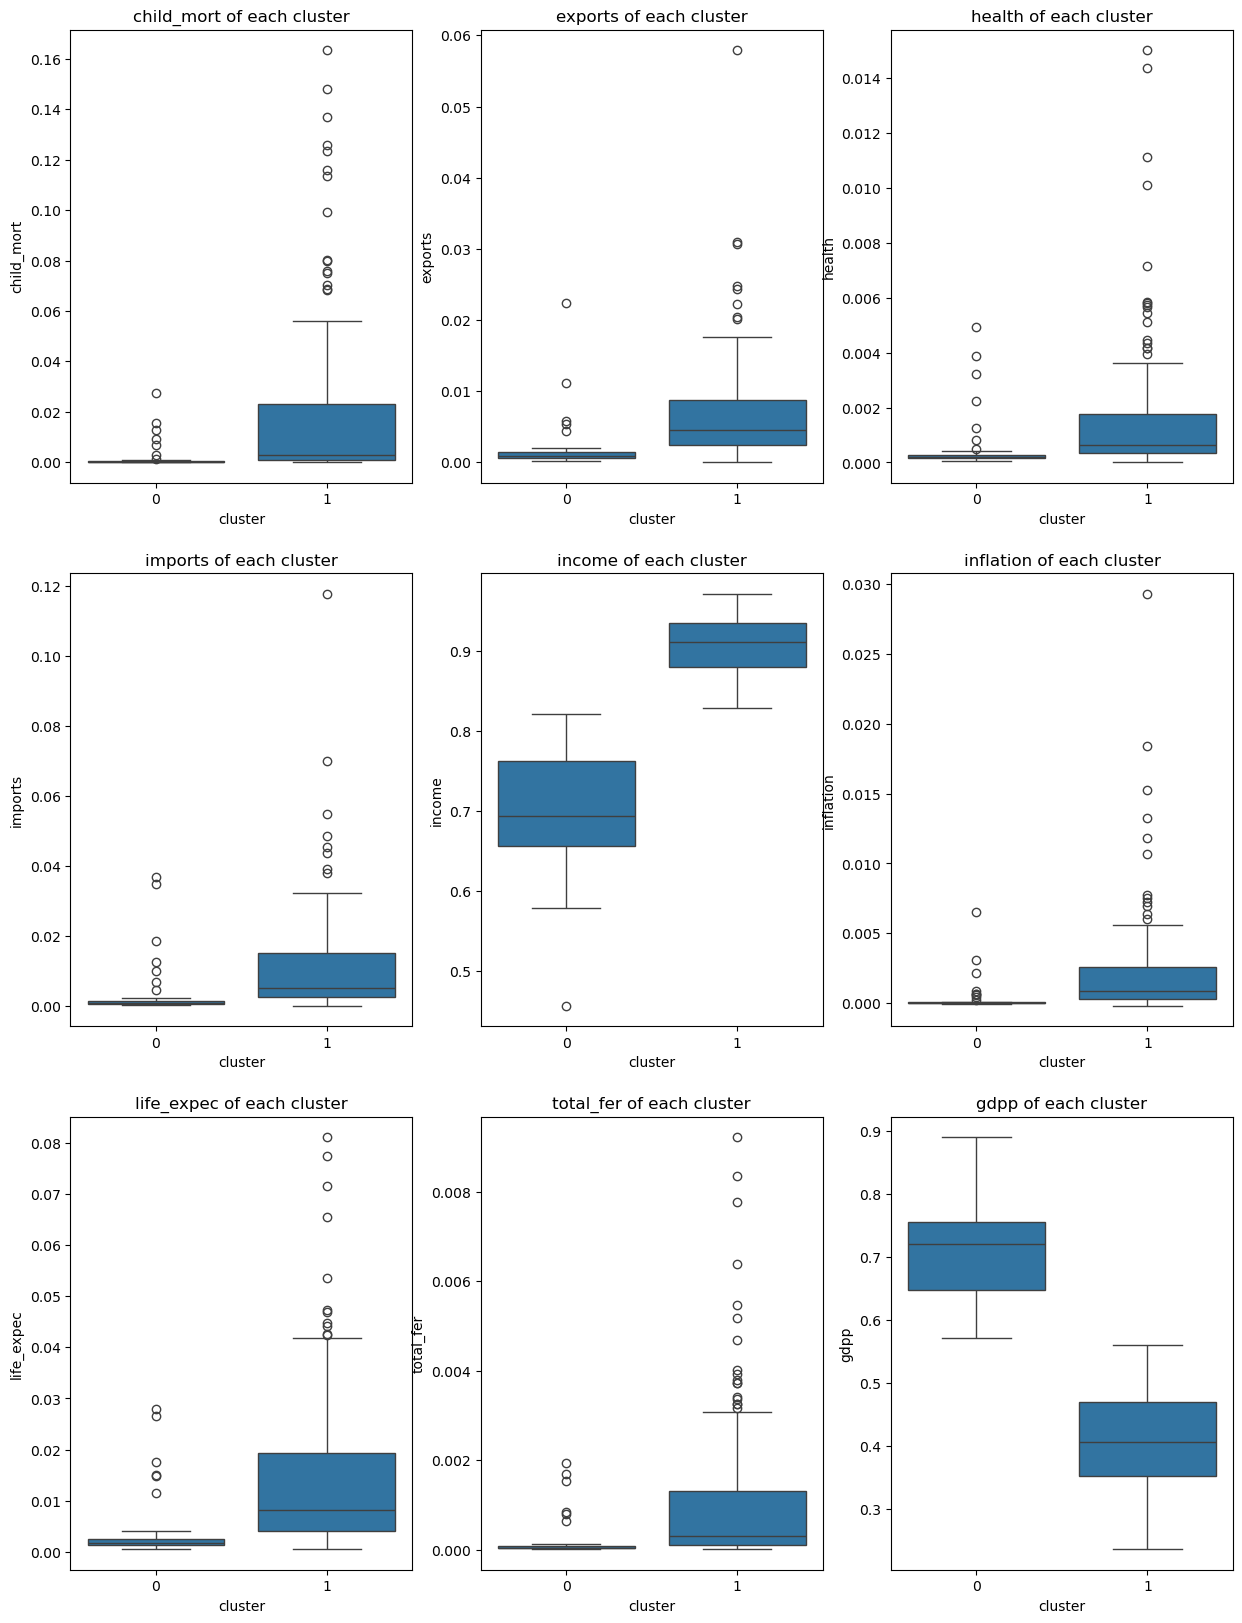

In [12]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,20))

plt.subplot(3,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data = df);
plt.title('child_mort of each cluster')

plt.subplot(3,3,2)
sns.boxplot(x = 'cluster', y = 'exports', data  = df);
plt.title('exports of each cluster')

plt.subplot(3,3,3)
sns.boxplot(x = 'cluster', y = 'health', data  = df);
plt.title('health of each cluster')

plt.subplot(3,3,4)
sns.boxplot(x = 'cluster', y = 'imports', data  = df);
plt.title('imports of each cluster')

plt.subplot(3,3,5)
sns.boxplot(x = 'cluster', y = 'income', data  = df);
plt.title('income of each cluster')

plt.subplot(3,3,6)
sns.boxplot(x = 'cluster', y = 'inflation', data  = df);
plt.title('inflation of each cluster')

plt.subplot(3,3,7)
sns.boxplot(x = 'cluster', y = 'life_expec', data  = df);
plt.title('life_expec of each cluster')

plt.subplot(3,3,8)
sns.boxplot(x = 'cluster', y = 'total_fer', data  = df);
plt.title('total_fer of each cluster')

plt.subplot(3,3,9)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df);
plt.title('gdpp of each cluster')

plt.show()

In [13]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

df['cluster'] = df['cluster'].apply(lambda x: 'Help Needed' if x == 0 else 'No Help Needed')

fig = px.choropleth(df[['country', 'cluster']],
                    locationmode='country names',
                    locations='country',
                    title='Which Countries may need Humanitary Help',
                    color='cluster',
                    color_discrete_map={'Help Needed':'Red', 'No Help Needed':'Green'})
fig.update_geos(fitbounds='locations', visible=True)
fig.update_layout(legend_title_text='Legend', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show(engine='kaleido')

In [14]:
# Drop cluster and country columns to keep working on the same dataset
df = df.drop(columns=['cluster', 'country'])
df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296


### Hierarchical Clustering

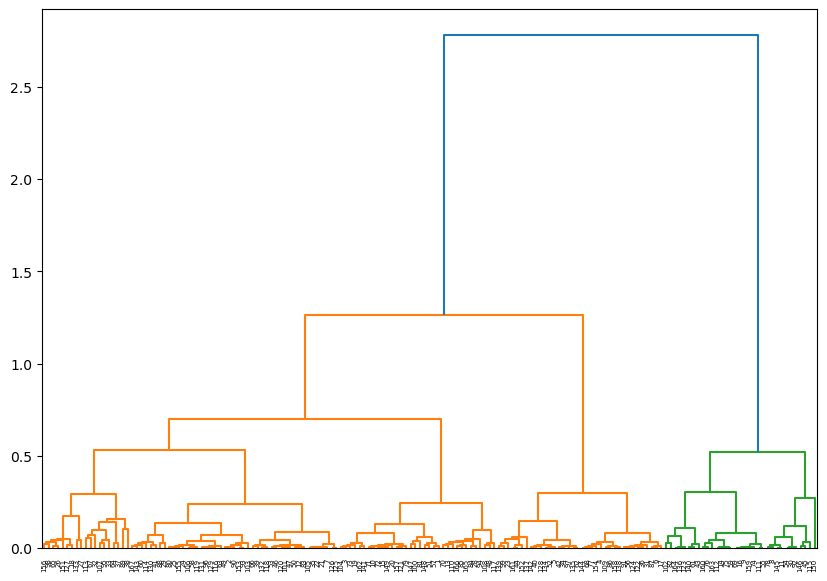

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linkage(df, metric='euclidean', method='ward'),
           orientation='top',
           labels=range(1, df.shape[0]+1),
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

Observing the dendogram, we can conclude that we may want to select 2 clusters for the Agglomerative approach.

In [16]:
from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
aggl.fit(df)

df['cluster'] = aggl.labels_
df['country'] = countries

print('Cluster 0:')
print(f"{df[df['cluster']==0].describe()}\n\n")
print('Cluster 1:')
print(f"{df[df['cluster']==1].describe()}")

Cluster 0:
       child_mort     exports      health     imports      income   inflation  \
count  134.000000  134.000000  134.000000  134.000000  134.000000  134.000000   
mean     0.019530    0.006787    0.001595    0.011042    0.901354    0.002184   
std      0.034060    0.007635    0.002475    0.015536    0.041330    0.003837   
min      0.000033    0.000028    0.000013    0.000017    0.791398   -0.000182   
25%      0.000720    0.002305    0.000325    0.002502    0.872179    0.000272   
50%      0.002937    0.004199    0.000610    0.004962    0.908432    0.000778   
75%      0.022569    0.008529    0.001760    0.014427    0.934024    0.002516   
max      0.163415    0.057900    0.015013    0.117818    0.971387    0.029302   

       life_expec   total_fer        gdpp  cluster  
count  134.000000  134.000000  134.000000    134.0  
mean     0.014957    0.001097    0.419440      0.0  
std      0.016395    0.001733    0.086430      0.0  
min      0.000554    0.000013    0.236038      

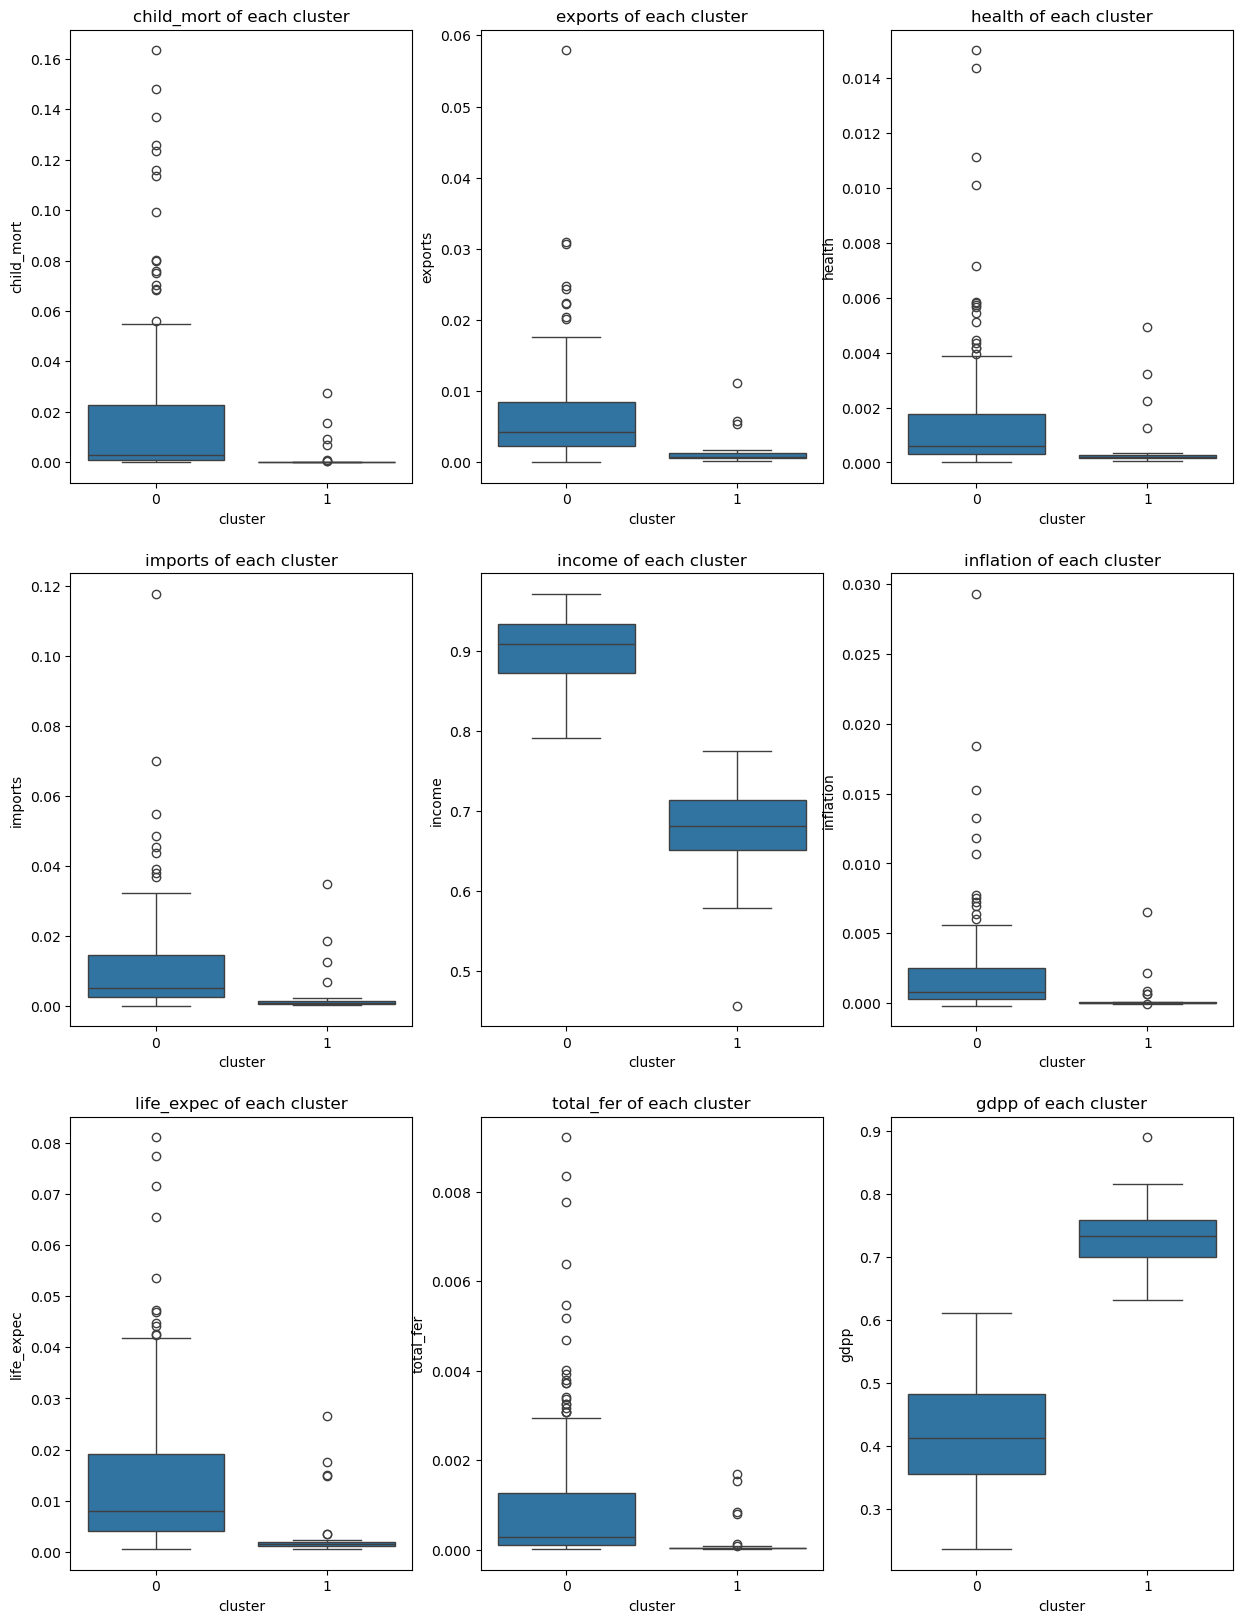

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,20))

plt.subplot(3,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data = df);
plt.title('child_mort of each cluster')

plt.subplot(3,3,2)
sns.boxplot(x = 'cluster', y = 'exports', data  = df);
plt.title('exports of each cluster')

plt.subplot(3,3,3)
sns.boxplot(x = 'cluster', y = 'health', data  = df);
plt.title('health of each cluster')

plt.subplot(3,3,4)
sns.boxplot(x = 'cluster', y = 'imports', data  = df);
plt.title('imports of each cluster')

plt.subplot(3,3,5)
sns.boxplot(x = 'cluster', y = 'income', data  = df);
plt.title('income of each cluster')

plt.subplot(3,3,6)
sns.boxplot(x = 'cluster', y = 'inflation', data  = df);
plt.title('inflation of each cluster')

plt.subplot(3,3,7)
sns.boxplot(x = 'cluster', y = 'life_expec', data  = df);
plt.title('life_expec of each cluster')

plt.subplot(3,3,8)
sns.boxplot(x = 'cluster', y = 'total_fer', data  = df);
plt.title('total_fer of each cluster')

plt.subplot(3,3,9)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df);
plt.title('gdpp of each cluster')

plt.show()

In [18]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

df['cluster'] = df['cluster'].apply(lambda x: 'Help Needed' if x == 0 else 'No Help Needed')

fig = px.choropleth(df[['country', 'cluster']],
                    locationmode='country names',
                    locations='country',
                    title='Which Countries may need Humanitary Help',
                    color='cluster',
                    color_discrete_map={'Help Needed':'Red', 'No Help Needed':'Green'})
fig.update_geos(fitbounds='locations', visible=True)
fig.update_layout(legend_title_text='Legend', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show(engine='kaleido')

In [19]:
# Drop cluster and country columns to keep working on the same dataset
df = df.drop(columns=['cluster', 'country'])
df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296


### Gaussian Mixture Models

In [20]:
from sklearn.mixture import GaussianMixture

models_and_bic = []

for n_cmps in range(2, 10):
    gmm = GaussianMixture(n_components=n_cmps, random_state=42)
    gmm.fit(df)
    models_and_bic.append({
        'model': gmm,
        'bic': gmm.bic(df),
    })

models_and_bic

[{'model': GaussianMixture(n_components=2, random_state=42),
  'bic': -11732.624606211948},
 {'model': GaussianMixture(n_components=3, random_state=42),
  'bic': -11685.970314699012},
 {'model': GaussianMixture(n_components=4, random_state=42),
  'bic': -11899.681519835909},
 {'model': GaussianMixture(n_components=5, random_state=42),
  'bic': -11722.837455136923},
 {'model': GaussianMixture(n_components=6, random_state=42),
  'bic': -11735.860301607681},
 {'model': GaussianMixture(n_components=7, random_state=42),
  'bic': -11659.147380345172},
 {'model': GaussianMixture(n_components=8, random_state=42),
  'bic': -11372.8899835956},
 {'model': GaussianMixture(n_components=9, random_state=42),
  'bic': -11162.404553943248}]

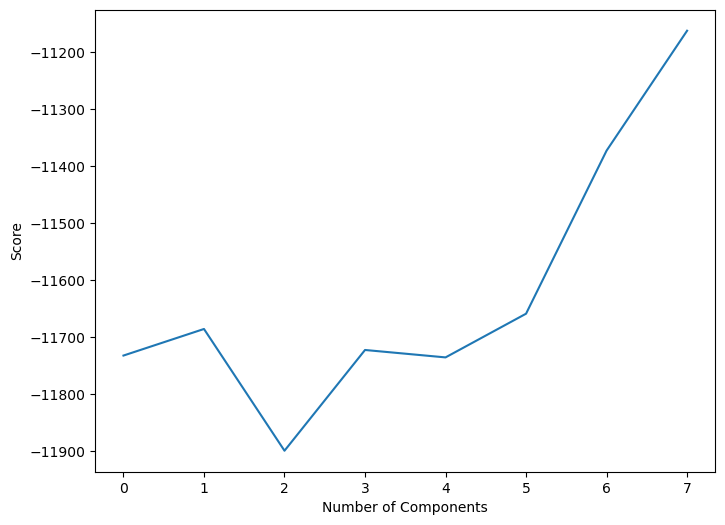

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.lineplot(data=list(map(lambda x: x['bic'], models_and_bic)), markers=True)
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.show()

In [22]:
best_model = models_and_bic[0]
gmm = best_model['model']
n_components = gmm.n_components
bic = best_model['bic']
labels = gmm.predict(df)

df['cluster'] = labels
df['country'] = countries

print('Best model:')
print(f'Clusters -- {n_clusters} clusters')
print('Cluster 0:')
print(f"{df[df['cluster']==0].describe()}\n\n")
print('Cluster 1:')
print(f"{df[df['cluster']==1].describe()}")

Best model:
Clusters -- 2 clusters
Cluster 0:
       child_mort    exports     health    imports     income  inflation  \
count   49.000000  49.000000  49.000000  49.000000  49.000000  49.000000   
mean     0.050157   0.012873   0.003510   0.023290   0.924556   0.005007   
std      0.041198   0.009431   0.003271   0.019841   0.028887   0.005205   
min      0.004059   0.000028   0.000414   0.000017   0.857916   0.000448   
25%      0.020830   0.007480   0.001567   0.011903   0.907092   0.001997   
50%      0.036749   0.010337   0.002483   0.018524   0.924274   0.003294   
75%      0.070255   0.015388   0.004356   0.027902   0.946978   0.005586   
max      0.163415   0.057900   0.015013   0.117818   0.971387   0.029302   

       life_expec  total_fer       gdpp  cluster  
count   49.000000  49.000000  49.000000     49.0  
mean     0.031092   0.002648   0.365103      0.0  
std      0.017321   0.002085   0.066815      0.0  
min      0.008739   0.000300   0.236038      0.0  
25%      0.017

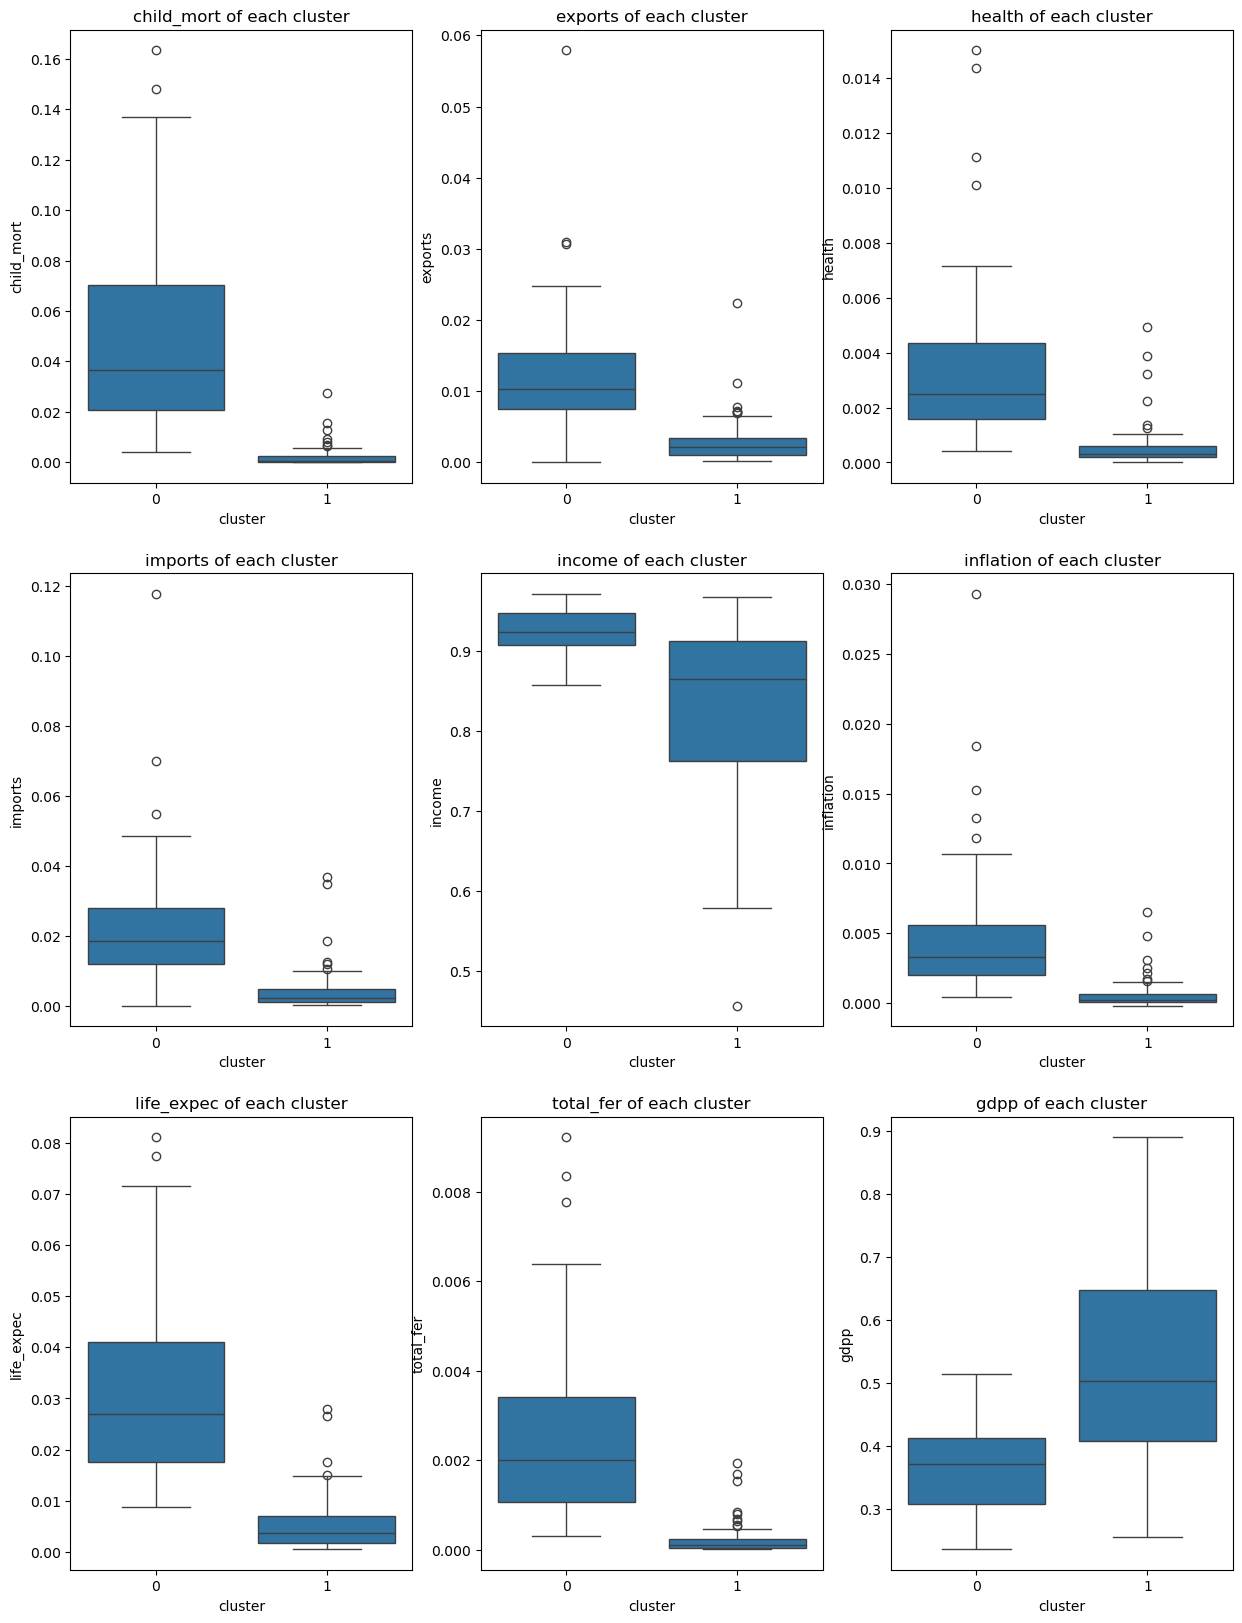

In [23]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,20))

plt.subplot(3,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data = df);
plt.title('child_mort of each cluster')

plt.subplot(3,3,2)
sns.boxplot(x = 'cluster', y = 'exports', data  = df);
plt.title('exports of each cluster')

plt.subplot(3,3,3)
sns.boxplot(x = 'cluster', y = 'health', data  = df);
plt.title('health of each cluster')

plt.subplot(3,3,4)
sns.boxplot(x = 'cluster', y = 'imports', data  = df);
plt.title('imports of each cluster')

plt.subplot(3,3,5)
sns.boxplot(x = 'cluster', y = 'income', data  = df);
plt.title('income of each cluster')

plt.subplot(3,3,6)
sns.boxplot(x = 'cluster', y = 'inflation', data  = df);
plt.title('inflation of each cluster')

plt.subplot(3,3,7)
sns.boxplot(x = 'cluster', y = 'life_expec', data  = df);
plt.title('life_expec of each cluster')

plt.subplot(3,3,8)
sns.boxplot(x = 'cluster', y = 'total_fer', data  = df);
plt.title('total_fer of each cluster')

plt.subplot(3,3,9)
sns.boxplot(x = 'cluster', y = 'gdpp', data  = df);
plt.title('gdpp of each cluster')

plt.show()

In [24]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

df['cluster'] = df['cluster'].apply(lambda x: 'Help Needed' if x == 0 else 'No Help Needed')

fig = px.choropleth(df[['country', 'cluster']],
                    locationmode='country names',
                    locations='country',
                    title='Which Countries may need Humanitary Help',
                    color='cluster',
                    color_discrete_map={'Help Needed':'Red', 'No Help Needed':'Green'})
fig.update_geos(fitbounds='locations', visible=True)
fig.update_layout(legend_title_text='Legend', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show(engine='kaleido')